<a href="https://colab.research.google.com/github/DkCodeProjct/AI_Projects..-/blob/main/Ai_Projects_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Andrej Karpathy

##  The spelled-out intro to neural networks and backpropagation: building micrograd

In [4]:
import matplotlib.pyplot as plt
import math
import numpy as np
%matplotlib inline

from micrograd.engine import Value
from micrograd.nn import Neuron, Layer, MLP



In [3]:
 !pip install micrograd

In [ ]:
def f(x):
    return 3*x**2 - 4*x + 5

f(3.0)

In [ ]:

xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [ ]:
h = 0.0001
x = 3.0
(f(x + h) - f(x))/h


In [81]:

class Value:
    def __init__(self, data, _childern=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None  # default is a no-op
        self._prev = set(_childern)    # previous nodes in the graph
        self._op = _op                 # operation that produced this node
        self.label = label             # node label for visualization

    def __repr__(self):
        return f'Value(data={self.data})'

    def __add__(self, other):
        output = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad += 1.0 * output.grad
            other.grad += 1.0 * output.grad
        output._backward = _backward
        return output

    def __mul__(self, other):
        output = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += other.data * output.grad
            other.grad += self.data * output.grad
        output._backward = _backward
        return output

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        output = Value(t, (self,), 'tanh')

        def _backward():
            self.grad += (1 - t**2) * output.grad
        output._backward = _backward
        return output

    def backward(self):
        topo = []
        visited = set()

        # Build the topological order
        def buildTopo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    buildTopo(child)
                topo.append(v)

        buildTopo(self)


        self.grad = 1.0
        for node in reversed(topo):
            node._backward()



In [10]:

a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a+b; e.label='e'
d = e + c; d.label='d'
f = Value(-2.0, label='f')
L = d * f; label='L'
# printing val
#d
#d._prev
#d1 = a.__add__(b).__mul__(c)
#d1
#d._op
L

Value(data=-18.0)

In [12]:

from graphviz import Digraph


In [77]:

def trace(rt):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(rt)
    return nodes, edges
def drawDot(rt):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})
    nodes, edges = trace(rt)

    for n in nodes:
        vid = str(id(n))
        # Check if the label exists and format it properly
        label_text = f'{n.label} | data {n.data:.4f} | grad {n.grad:.4f}' if n.label else f'data {n.data:.4f} | grad {n.grad:.4f}'

        dot.node(name=vid, label=f'{{{label_text}}}', shape='record')

        if n._op:
            dot.node(name=vid + n._op, label=f'{n._op}')
            dot.edge(vid + n._op, vid)

    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot


In [ ]:
#a.grad = -1
#b.grad = 2.3
#drawDot(L)

In [ ]:
def lol():
    h = 0.001

    # First set of operations
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a + b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L1 = L.data

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a + b; e.label = 'e'
    d = e + c; d.label = 'd'
    c.data += h
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L2 = L.data + h  # Add h to the data

    print((L2 - L1) / h)

lol()


##Taking Derivatives
###   using The Chain Rule

In [ ]:
dd / dc = ? 1.0
dd / de = 1.0
d = c + e

WANT;
dL / dd
dd / dc

In [ ]:
#Activations And BackProb

# Activation tanh
plt.plot(np.arange(-5, 5, 0.2), np.tanh(np.arange(-5, 5, 0.2))); plt.grid()

In [78]:
#Inputs
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

w1 = Value(-3.0,label='w1')
w2 = Value(1.0, label='w2')
b = Value(6.7, label='b')
### // x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label='x1w1'
x2w2 = x2*w2; x2w2.label='x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1w1+x2w2'
n = x1w1x2w2 + b; n.label='n'
output = n.tanh(); label='o'


#Using _backward ....

In [57]:
#output.grad = 1.0


In [58]:
#output._backward()

In [59]:
#n._backward()

In [51]:
#b._backward()

In [52]:
#x1w1._backward()
#x2w2._backward()

In [61]:
#x1w1x2w2._backward()

In [79]:
output.backward()

# Apply Backprop Using Topological Sort..


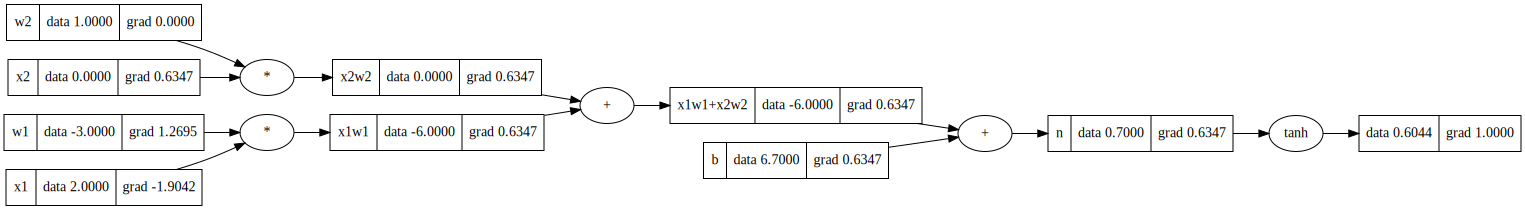

In [80]:
drawDot(output)

# Topological Sort

In [65]:

#topo = []
#visited = set()
#def buitTopo(v):
#    if v not in visited:
#        visited.add(v)
#        for child in v._prev :
#            buitTopo(child)
#        topo.append(v)
#buitTopo(output)
#
#for node in reversed(topo):
#    node._backward()

In [62]:

#topo = []
#visited = set()
#def buitTopo(v):
#    if v not in visited:
#        visited.add(v)
#        for child in v._prev :
#            buitTopo(child)
#        topo.append(v)
#buitTopo(output)
#topo

[Value(data=0.0),
 Value(data=1.0),
 Value(data=0.0),
 Value(data=2.0),
 Value(data=-3.0),
 Value(data=-6.0),
 Value(data=-6.0),
 Value(data=6.7),
 Value(data=0.7000000000000002),
 Value(data=4.8086030029030695)]

In [ ]:
#output.grad = 1.0
#n.grad = 0.5
#x1w1x2w2.grad = 0.5
#b.grad = 0.5
#x1w1.grad=0.5
#x2w2.grad=0.5
#
#x2.grad = w2.data * x1w1.grad
#w2.grad = x1.data * x1w1.grad
#
#
#x1.grad = w2.data * x1w1.grad
#w1.grad = x1.data * x1w1.grad
#1-output.data**2

-22.122662839528417